In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def solve_least_squares(x: np.ndarray, y:np.ndarray) -> np.ndarray:
    assert x.ndim == 1
    assert y.ndim == 1
    assert x.shape[0] == y.shape[0]  
    A = np.vstack([x, np.ones_like(x)]).T 
    x_hat = np.linalg.inv(A.T @ A) @ A.T @ y    
    slope, intercept = x_hat
    return np.array([slope, intercept])

In [4]:
def test_solve_least_squares():
    x = np.arange(1, 10)
    y = 3*x + 1
    coeffs = solve_least_squares(x, y)
    assert np.isclose(coeffs, np.array([3, 1])).all(), 'Incorrect coefficients computed'
    print("TEST 1: SUCCESS")

test_solve_least_squares()

TEST 1: SUCCESS


In [4]:
temp_data = pd.read_csv("")
temp_data["date"] = pd.to_datetime(temp_data["date"])
# temp_data["month"] = temp_data['date'].map(lambda x: (x.year*12 + x.month))
temp_data.describe()

,date,avg_temp
count,1992,1992.000000
mean,1932-12-16 00:11:33.975903744,8.571583
min,1850-01-01 00:00:00,0.404000
25%,1891-06-23 12:00:00,4.430000
50%,1932-12-16 12:00:00,8.850500
75%,1974-06-08 12:00:00,12.858500
max,2015-12-01 00:00:00,15.482000
std,NaN,4.263193


In [5]:
year_data = temp_data.groupby(temp_data['date'].map(lambda x: x.year)).mean().reset_index(drop=True)
year_data

,date,avg_temp
0,1850-06-16 12:00:00,7.900667
1,1851-06-16 12:00:00,8.178583
2,1852-06-16 08:00:00,8.100167
3,1853-06-16 12:00:00,8.041833
4,1854-06-16 12:00:00,8.210500
...,...,...
161,2011-06-16 12:00:00,9.516000
162,2012-06-16 08:00:00,9.507333
163,2013-06-16 12:00:00,9.606500
164,2014-06-16 12:00:00,9.570667


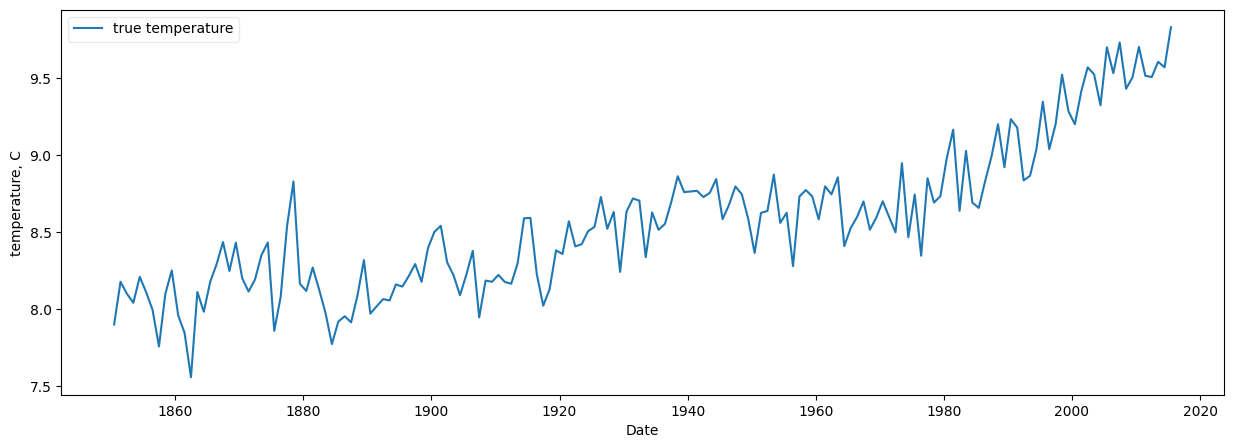

In [6]:
def plot_temps(time, data, prediction=None):
    plt.figure(figsize=(15,5))
    plt.plot(time, data, label="true temperature")

    if not (prediction is None):
        plt.plot(time, prediction, label="predicted temperature")

    plt.xlabel("Date")
    plt.ylabel("temperature, C")
    plt.legend(framealpha=0.4)
    plt.show()

plot_temps(year_data["date"], year_data["avg_temp"])


In [7]:
def RMSE(predicted, reference):
    return np.sqrt(np.mean((predicted - reference)**2))

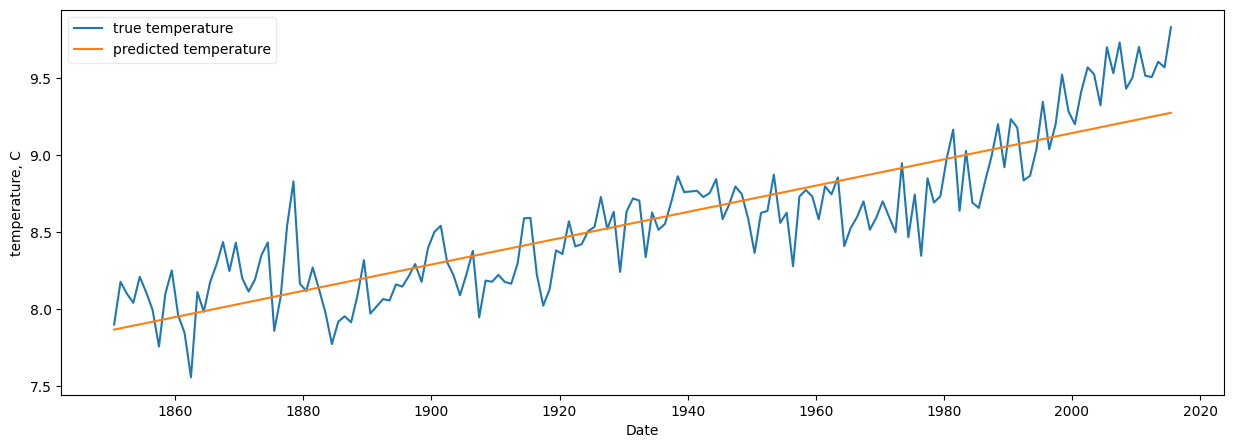

RMSE:  0.23640974195999212


In [8]:
years = np.arange(year_data.shape[0])

slope = None
intercept = None
slope, intercept = solve_least_squares(years, year_data["avg_temp"])
predicted_temps = slope * years + intercept

plot_temps(year_data["date"], year_data["avg_temp"], predicted_temps)
print("RMSE: ", RMSE(predicted_temps, year_data["avg_temp"]))

In [9]:
def solve_least_squares_general(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    assert X.ndim == 2
    assert X.shape[1] == y.shape[0]
    assert y.ndim == 1
    n = y.shape[0]
    x = np.vstack([np.ones_like(X[0]), X]).T 
    A_hat = np.linalg.inv(x.T @ x) @ x.T @ y 
    coeffs = A_hat
    assert coeffs.shape[0] == X.shape[0] + 1  

    return coeffs

In [10]:
def predict_general(X: np.ndarray, coeffs:np.ndarray) -> np.ndarray:
    assert X.ndim == 2
    assert coeffs.ndim == 1
    assert coeffs.shape[0] == X.shape[0] + 1  
    X = np.vstack([np.ones_like(X[0]), X]).T 
    return X @ coeffs

In [11]:
def test_solve_least_squares_general():
    x1 = np.arange(1, 10)
    x2 = x1**2
    y = 1 + 3*x1 + 2*x2
    X = np.array([ x1, x2 ])
    coeffs = solve_least_squares_general(X, y)
    assert np.isclose(coeffs, np.array([1, 3, 2])).all(), 'Incorrect coefficients computed'
    print("TEST 2: SUCCESS")

test_solve_least_squares_general()

TEST 2: SUCCESS


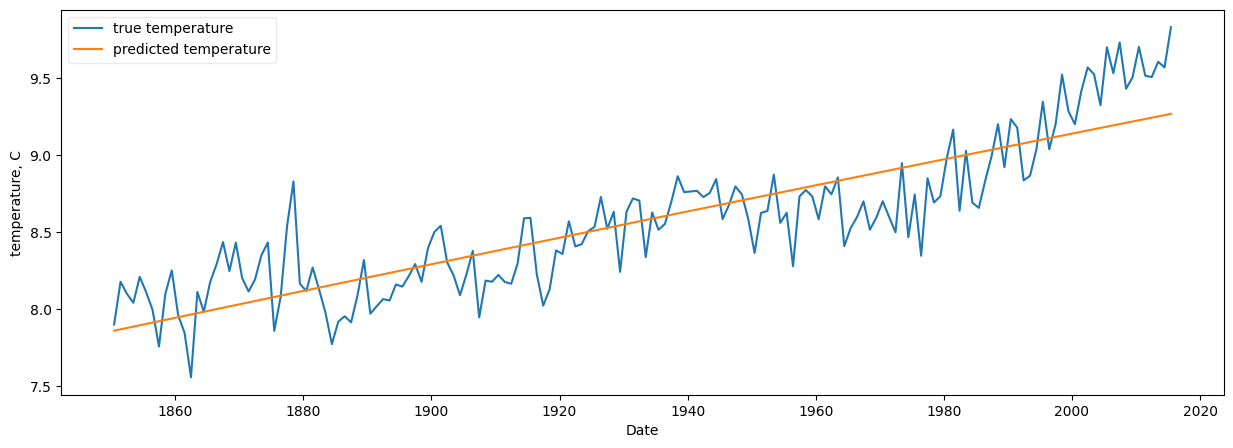

RMSE:  0.23789281561891792


In [12]:
coeffs = None
f1 = years
f2 = years ** 2
X = np.array([f1, f2])

coeffs = solve_least_squares_general(X, year_data["avg_temp"])
predicted_temps = predict_general(X, coeffs)
plot_temps(year_data["date"], year_data["avg_temp"], predicted_temps)

print("RMSE: ", RMSE(predicted_temps, year_data["avg_temp"]))


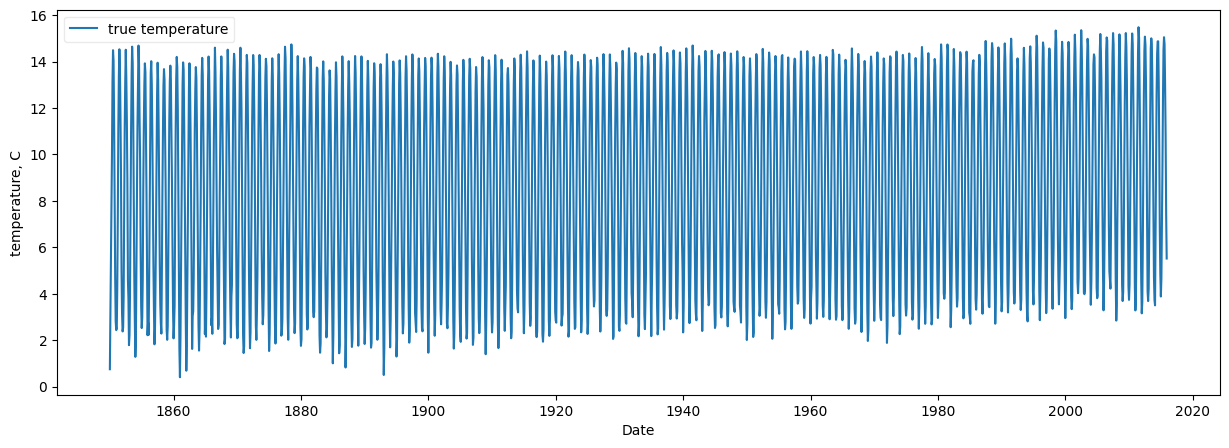

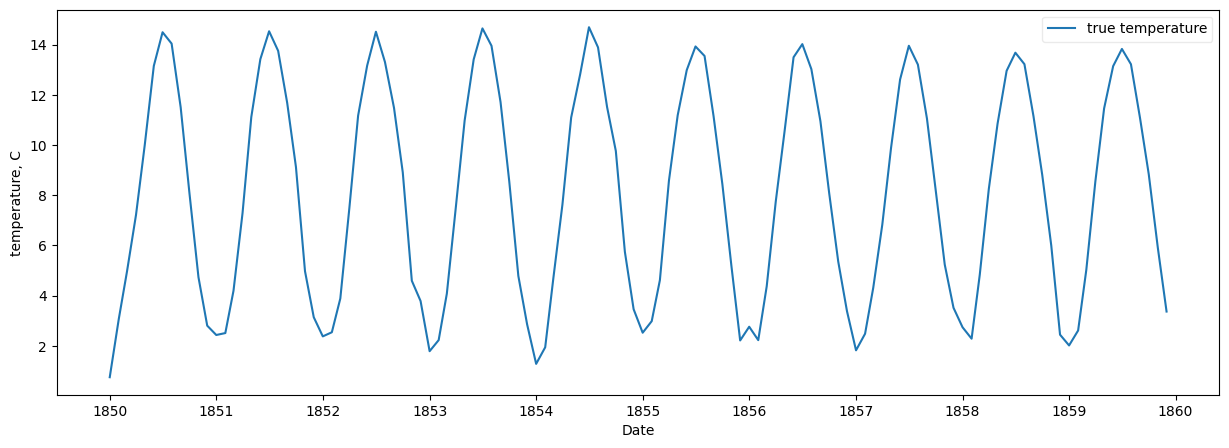

In [13]:
plot_temps(temp_data["date"], temp_data["avg_temp"])
plot_temps(temp_data[:120]["date"], temp_data[:120]["avg_temp"])

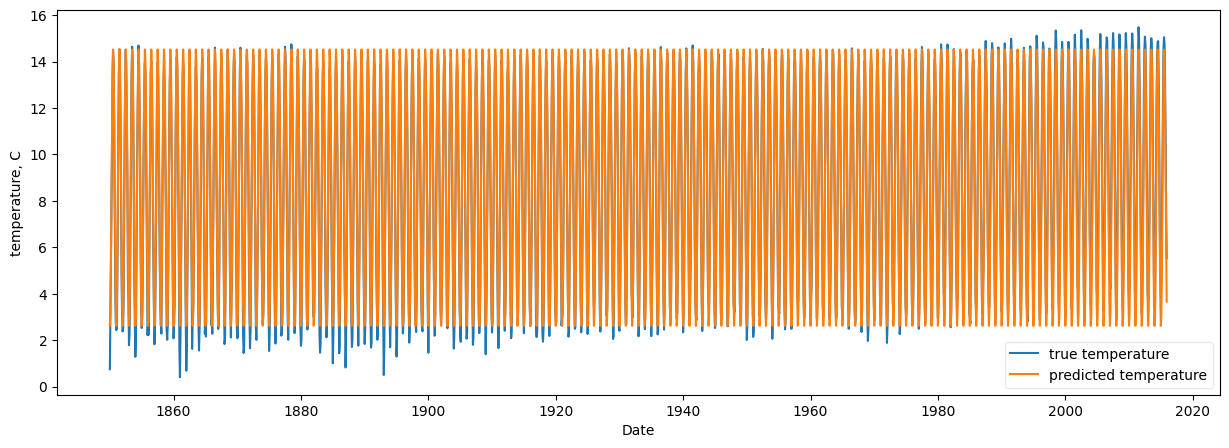

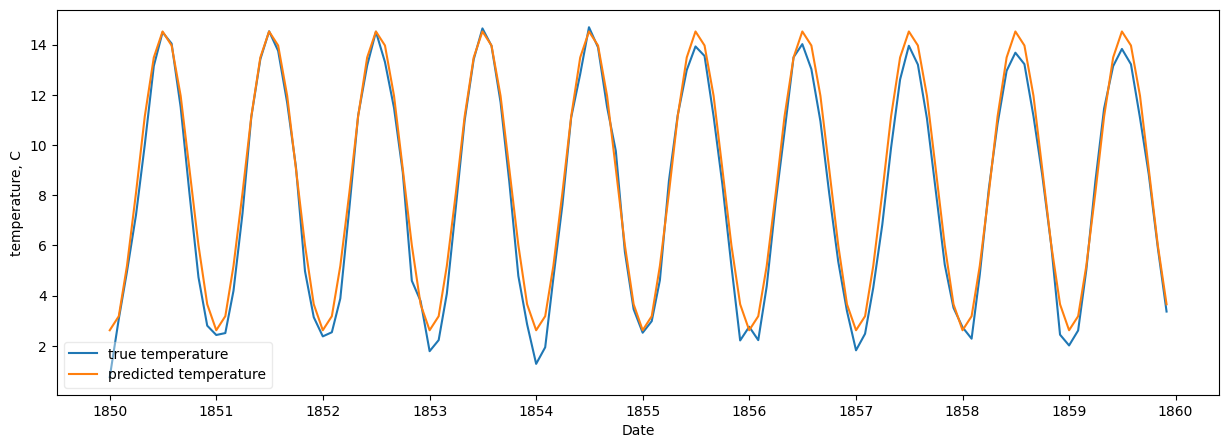

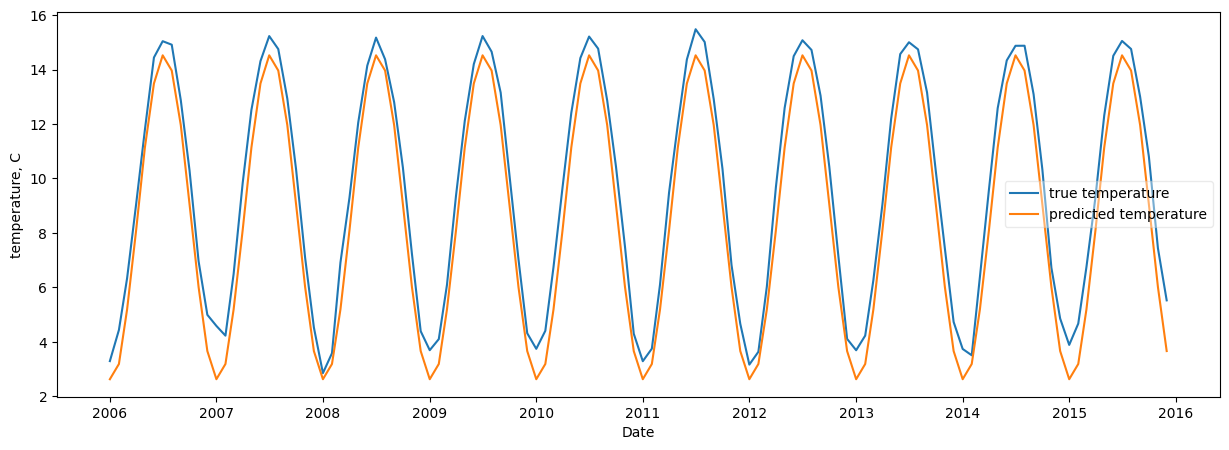

RMSE:  0.5848254249227474


In [14]:
months = np.arange(temp_data.shape[0])
coeffs = None
T = 12
f1 = np.sin(2 * np.pi * months / T)
f2 = np.cos(2 * np.pi * months / T)
X_month = np.array([f1, f2])
coeffs = solve_least_squares_general(X_month, temp_data["avg_temp"])
predicted_temps = predict_general(X_month, coeffs)
plot_temps(temp_data["date"], temp_data["avg_temp"], predicted_temps)
# First 10 years:
plot_temps(temp_data["date"][:120], temp_data["avg_temp"][:120], predicted_temps[:120])
# Last 10 years:
plot_temps(temp_data["date"][-120:], temp_data["avg_temp"][-120:], predicted_temps[-120:])

print("RMSE: ", RMSE(predicted_temps, temp_data["avg_temp"]))


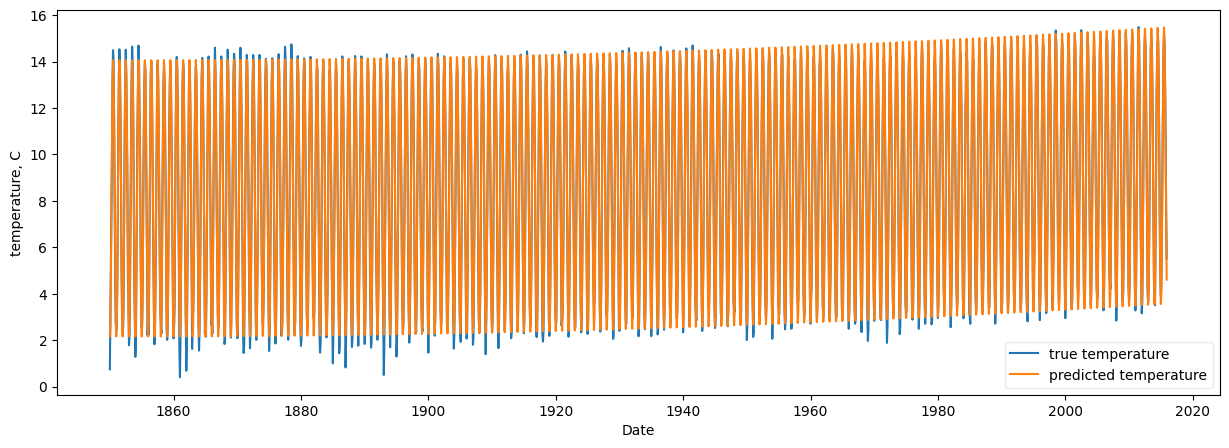

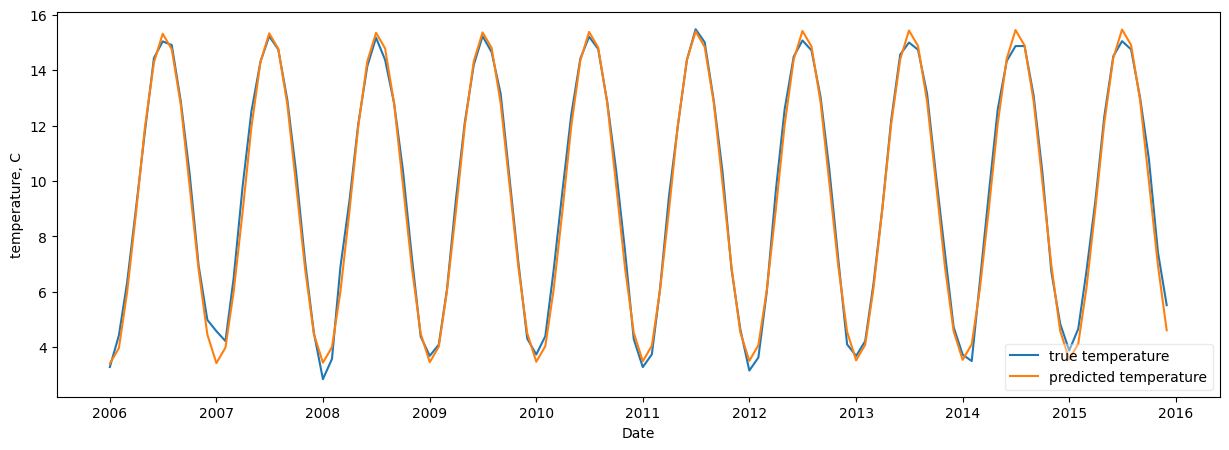

RMSE:  0.40309485139695167


In [15]:
months = np.arange(temp_data.shape[0])
coeffs = None
f1 = months
f2 = months ** 2
f3 = np.sin(2 * np.pi * months / T)
f4 = np.cos(2 * np.pi * months / T)
X_month = np.array([f1, f2, f3, f4])
#  Calculate slope and intercept using least squares
coeffs = solve_least_squares_general(X_month, temp_data["avg_temp"])
# Predict temperature using a linear model
predicted_temps = predict_general(X_month, coeffs)
plot_temps(temp_data["date"], temp_data["avg_temp"], predicted_temps)
# Last 10 years:
plot_temps(temp_data["date"][-120:], temp_data["avg_temp"][-120:], predicted_temps[-120:])

print("RMSE: ",  RMSE(predicted_temps, temp_data["avg_temp"]))
